# Função de transferência de sistemas contínuos

Renato Naville Watanabe

## Preparação do ambiente

In [ ]:
import matplotlib.pyplot as plt
import sympy as sym

## Definição do problema

Aqui, vamos considerar o formato geral de uma equação diferencial de um sistema linear e invariante no tempo:

$$\frac{d^Ny}{dt^N} + a_{N-1}\frac{d^{N-1}y}{dt^{N-1}}+...+a_0y(t) = b_M\frac{d^Mx}{dt^M} +...+b_2\frac{d^2x}{dt^2}+b_1\frac{dx}{dt} + b_0x(t) $$

Como já vimos anteriormente, a solução desta equação é formada por duas partes:

$$y(t) = y_{zi}(t) + y_{zs}(t)$$

em que $y_{zi}(t)$ é a parte de $y$ devida às condições iniciais do sinal de saída (os valores de $y(0), \frac{dy}{dt}(0), ..., \frac{d^{N-1}y}{dt^{N-1}}(0)$). Para o cálculo dessa componente, considera-se que a entrada $x(t)$ é nula ($zi$ é de *zero input*, **entrada nula** em inglês).

A outra componente, $y_{zs}(t)$, é devido à entrada $x(t)$. Para o cálculo dessa componente consideramos que os valores de $y(0), \frac{dy}{dt}(0), ..., \frac{d^{N-1}y}{dt^{N-1}}(0)$ são todos iguais a 0 ($zs$ é de *zero state*, **estado nulo** em inglês, às vezes também chamado de **repouso**).

Vamos agora encontrar essas duas partes da solução utilizando transformada de Laplace. É consideravelmente mais simples do que o método clássico.

## Resposta de estado nulo



Como já vimos anteriormente, a transformada de Laplace de $\frac{d^mx}{dt^m}$ é:

$\mathcal{L}\left(\frac{d^mx}{dt^m}\right) = s^{m}X(s)$

e a transformada Z de $\frac{d^my}{dt^m}$ é:

$\mathcal{Z}\left(\frac{d^mx}{dt^m}\right) = s^{m}Y(s)$

Substituindo essas transformadas dos sinais atrasado na equação de diferenças, temos:

$$s^NY(s) + a_{N-1}s^{N-1}Y(z)+...+a_0Y(z) = b_Ms^{M}X(s) +...+b_2s^2X(s)+b_1sX(s) + b_0X(s)$$

Com isso, podemos definir a função $H(s)$:

$H(s) = \frac{Y(s)}{X(s)} = \frac{b_Ms^M +...+b_2s^2+b_1s + b_0}{s^N + a_{N-1}s^{N-1}+...+a_0}$

Essa função é conhecida como **função de transferência** do sistema. Ela é obtida diretamente dos coeficientes da equação diferencial.

---

### Exemplo 1

Vamos considerar o sistema com a seguinte equação de diferenças:

$\frac{d^2y}{dt^2} + 3\frac{dy}{dt} - 4y(t) = 3x(t) + \frac{dx}{dt}$

A função de transferência deste sistema é:

$H(s) = \frac{s+3}{s^2 + 3s-4}$

---

---

### Exemplo 2

Vamos considerar o sistema com a seguinte equação diferencial:

$\frac{dy}{dt}  = -0.5y(t) + x(t)$

A função de transferência deste sistema é:

$H(s) = \frac{1}{s + 0.5}$

---

Observando a expressão da função de transferência, vemos que se $X(s) = 1$, $Y(s) = H(s)$. O sinal $x(t)$ que tem uma transformada de Laplace igual a 1 é o impulso de Dirac ($x(t)=\delta(t)$). Portanto a função de transferência é a transformada de Laplace da resposta ao impulso.

$H(s) = \int_{0}^\infty h(t)e^{-st}\,dt$

---

### Exemplo 3

A resposta ao impulso do sistema do exemplo 2 é:

$h(t) = e^{-0.5t}u(t)$

A transformada de Laplace dessa resposta ao impulso é:

$H(s) = \int_{0}^\infty  e^{-0.5t}u(t) e^{-st}\,dt= \int_{0}^\infty  e^{-(0.5+s)t} \,dt = \left.\frac{e^{-(0.5+s)t}}{-(0.5+s)}\right|_{t=0}^\infty = \frac{1}{s+0.5}$

Como esperado, a função encontrada foi a mesma do exemplo 2.

---

A partir da expressão da função de transferência, chegamos à expressão para $Y(s)$:

$H(s) = \frac{Y(s)}{X(s)} \rightarrow Y(s) = H(s)X(s)$

Também podemos chegar a essa expressão pela propriedade da convolução da transformada Z:

$y(t) = h(t)*x(t) \rightarrow Y(s) = H(s)X(s)$

Tendo $Y(s)$, basta calcular a sua transformada inversa para encontrar $y(t)$.

---

### Exemplo 4

Vamos considerar o mesmo sistema do exemplo 2 e encontrar o sinal de saída quando a entrada é um degrau.

$x(t) = u(t)$

A sua transformada de Lapalace é:

$X(s) = \frac{1}{s}$

Então, a transformada de Laplace do sinal de saída é:

$Y(s) = H(s)X(s) = \frac{1}{s + 0.5}\frac{1}{s} = \frac{1}{s(s+0.5)} $

Expandindo $Y(s)$ em frações parciais:

$Y(s) = H(s)X(s) = \frac{1}{s(s+0.5)} = \frac{A_1}{s} + \frac{A_2}{s+0.5}$

Com

$A_1 = \left.\frac{1}{s+0.5}\right|_{s=0}=2$ e $A_2=\left.\frac{1}{s}\right|_{s=-0.5}=-2$

Então $Y(s)$ é:

$Y(s) = \frac{2}{s} - \frac{2}{s+0.5}$

Com a transformada de Laplace inversa de $Y(s)$, chegamos ao sinal de saída do sistema:

$y(t) = 2u(t) - 2e^{-0.5t}u(t) = 2(1-e^{-0.5t})u(t)$

Abaixo é mostrado o gráfico do sinal.

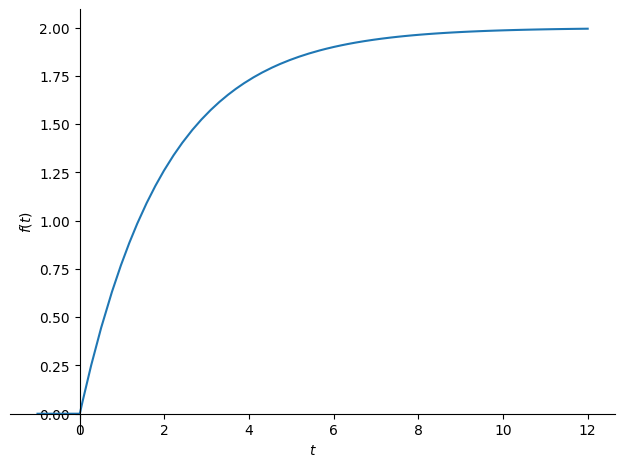

In [ ]:
t = sym.symbols('t')
y = 2*(1-sym.exp(-0.5*t))*sym.Heaviside(t)
sym.plot(y, (t, -1, 12));

---

## Resposta de entrada nula

Na resposta de entrada nula, considera-se que não existe entrada. Dessa maneira, a equação de diferenças fica:

$$\frac{d^Ny}{dt^N} + a_{N-1}\frac{d^{N-1}y}{dt^{N-1}}+...+a_0y(t) = 0 $$

Aqui, vamos considerar as condições iniciais. A transformada de Laplace de $\frac{d^My}{dt^M}$ quando existem condições iniciais no sinal $y(t)$ é:

$\mathcal{Z}(\frac{d^My}{dt^M}) = s^MX(s)-\displaystyle\sum_{k=2}^M s^{M-k}\frac{d^{k-1}x}{dt^{k-1}}(0) - s^{M-1}x(0)$

Fazendo essa substituição na equação diferencial, é possível obter a resposta de entrada nula.


---

### Exemplo 5

Vamos considerar o sistema do exemplo 1, com a seguinte equação de diferenças:

$\frac{d^2y}{dt^2} + 3\frac{dy}{dt} - 4y(t) = 3x(t) + \frac{dx}{dt}$

com $y(0) = 1$ e $\frac{dy}{dt}(0) = -1$ e um sinal de entrada $x(t) = \mathrm{sen}\left(2\pi 2t\right)u(t)$

Primeiro, vamos encontrar a resposta de entrada nula. Então, a transformada de Laplace da resposta de entrada nula:

$s^2Y_{zi}(s) -\frac{dy}{dt}(0) - sy(0) + 3sY_{zi}(z) -3y(0)  - 4Y_{zi}(z) = 0$

$Y_{zi}(z) = \frac{3y(0) + \frac{dy}{dt}(0)+sy(0)}{s^2 + 3s- 4} = \frac{s+2}{s^2 + 3s- 4}$

Agora, fazemos a expansão em frações parciais de $Y_{zi}(s)$:


$Y_{zi}(s) = \frac{s+2}{s^2 + 3s- 4} = \frac{s+2}{(s+4)(s-1)} = \frac{A_1}{s+4}+\frac{A_2}{s-1}$

$A_1 = \left.\frac{s+2}{(s-1)}\right|_{s=-4} = 0.4$ e $A_2 = \left.\frac{s+2}{s+4}\right|_{s=1} = 0.6$

Agora, conseguimos encontrar $y_{zi}(t)$:

$Y_{zi}(s) = \frac{0.4}{s+4}-\frac{0.6}{s-1} \rightarrow y_{zi}(t) = 0.4e^{-4t}u(t) -0.6e^tu(t)$



---

## Diagrama de blocos

Com o conceito de transformada de Laplace, podemos agora introduzir uma nova forma, muito mais utilizada, de representar um integrador no diagrama de blocos.

<img src=https://github.com/jorginL/SistemasESinais/blob/Jorge/Imagens/integscont.png?raw=1 width="400">

Com a transformada de Laplace é muito mais fácil obter a equação diferencial a partir do diagrama de blocos. Basta substituir os sinais por suas transformadas e lembrar que a convolução no domínio do tempo é uma multiplicação no domínio da frequência.

---

### Exemplo 6

Considere o seguinte diagrama de blocos:

<img src=https://github.com/jorginL/SistemasESinais/blob/Jorge/Imagens/diagexemploLaplace.png?raw=1 width="550">

Podemos chamar o resultado do somador à esquerda de $w(t)$. A sua transformada de Laplace é $W(s)$, que é igual a:

$W(s) = X(s) - 3\frac{1}{s}W(s)-5\frac{1}{s^2}W(s) \rightarrow W(s) = \frac{X(s)}{1+3\frac{1}{s}W(s)+5\frac{1}{s^2}} = \frac{X(s)s^2}{s^2+3s+5}$

E agora,  $Y(s)$ é:

$Y(s) = 2W(s) - 3\frac{1}{s}W(s) = \frac{(2s^2-3s)}{s^2+3s+5}X(s)$

Então:

$(s^2+3s+5)Y(s) = (2s^2-3s)X(s) \rightarrow \frac{d^2y}{dt^2}+3\frac{dy}{dt}5y(t) = 2\frac{d^2x}{dt^2}-3\frac{dx}{dt}$

Seria muito difícil obter a equação diferencial sem a transformada de Laplace.

---

## Exercícios



## Referências

- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Lathi, BP, Sinais e Sistemas Lineares, 2007
- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010

## Solução dos exercícios

Transferência contínuo:\

\

\

***Exercício 3a.***

\

\

a) $\frac{d y}{d t}=-6 y(t)+x(t) ; \quad x(t)=u(t)$
\
rearranjando: \
$\frac{d y}{d t}+6 y(t)=x(t)$
\
Por meio da propriedade da transformada de laplace da convolução
\begin{aligned}
H(s)=\frac{Y(s)}{X(s)} \Rightarrow H(s) & =\frac{1}{s+6} \Rightarrow Y(s)=H(s) X(s) \\
Y(s) & =\frac{1}{s+6} \cdot \frac{1}{s}
\end{aligned}
Vamos encontrar $y(t)$ pelo método das fraçōes parciais:
\begin{gathered}
\frac{1}{s(s+6)}=\frac{A_1}{s}+\frac{A_2}{s+6} \\
A_1=\left.\frac{1}{s+6}\right|_{s=0}=\frac{1}{6} \quad, \quad A_2=\left.\frac{1}{s}\right|_{s=-6}=-\frac{1}{6} .
\end{gathered}
temos:
$Y(s)=\frac{1}{6 s}-\frac{1}{6(s+6)}$
\
Fazendo a transformada de laplace inversa:
$y(t)=\frac{u(t)}{6}-\frac{e^{-6 t} u(t)}{6}$
\
Parte permanente: $u(t)$ \
Parte tarnsitória: $-e^{-6 t}u(t)$

\

\

***Exercício 3b.***

\

\

b) $\quad \frac{d y}{d t}=4 y(t)+x(t) ; \quad x(t)=e^{-3 t} u(t)$
\
rearranjando,
\
$ \quad \frac{d y}{d t}-4 y(t)=x(t)$ \\
Por meio da propriedade da transformada de laplace da convolução
\
\begin{aligned}
H(s)=\frac{Y(s)}{X(s)} \Rightarrow H(s) & =\frac{1}{s-4} \Rightarrow Y(s)=H(s) X(s) \\
X(s)=\frac{1}{s+3} \Rightarrow Y(s) & \Rightarrow H(s) X(s)=\frac{1}{(s-4)(s+3)}
\end{aligned}
Determinando $Y(s)$ pelo método das frações parciais:
\begin{gathered}
Y(s)=\frac{1}{(s-4)(s+3)}=\frac{A_1}{(s-4)}+\frac{A_2}{(s+3)} \\
A_1=\left.\frac{1}{s+3}\right|_{s=4}=\frac{1}{7} \quad ; \quad A_2=\left.\frac{1}{(s-4)}\right|_{s=-3}=-\frac{1}{7}
\end{gathered}
Fazendo a transformada de laplace inversa:
\begin{aligned}
&y(t)=\frac{e^{4 t} u(t)}{7}-\frac{e^{-3 t} u(t)}{7}
\end{aligned}
Parte permanente: $\frac{e^{4 t} u(t)}{7}$;    
Parte transitoria $=-\frac{e^{-2 t} u(t)}{7}$

\

\

\
***Exercício 3c.***

\

\

c) $\frac{d^2 y}{d t}=-\frac{d y}{d t}+\frac{d x}{d t}+x(t) ; \quad x(t)=25 u(t)$
rearranjando,
$\frac{d^2 y}{d t}+\frac{d y}{d t}=\frac{d x}{d t}+x(t)$ \
\
Por meio da propriedade da transformada de laplace da convolução
\begin{gathered}
H(s)=\frac{Y(s)}{X(s)} \Rightarrow H(s)=\frac{s+1}{s^2+s}-\frac{s+1}{s(s+1)} \Rightarrow Y(s)=H(s) X(s) \\
X(s)=\frac{25}{s} ; \quad Y(s)=H(s) X(s)=\frac{25(s+1)}{s^2(s+1)}
\end{gathered}
Determinando $Y(s)$ por frações parciais
\begin{gathered}
Y(s)=\frac{s+1}{s^2(s+1)}=\frac{A_1}{s}+\frac{A_2}{s^2}+\frac{A_3}{(s+1)} \\
A_1=\left.\frac{25(s+1)}{s(s+1)}\right|_{s=0}=0 ; \quad A_2=\left. \frac{25(s+1)}{s+1}\right|_{s=0}=25 ; \quad A_3=\left.\frac{25(s+1)}{s^2}\right|_{s=-1}=0
\end{gathered}
fazendo a transformada de laplace inversa,
$y(t)=25 t u(t)$
Possui apenos parte permanente: $25tu(t)$

\

\

***Exercício 3d.***

\

\

d)
\begin{aligned}
\frac{d^2 y}{d^2 t}=-4 y(t)+x(t) ; \quad & x(t)=\cos (2 t) u(t) \\
& \frac{d^2 y}{d^2 t}+4 y(t)=x(t) \\
H(s)=\frac{Y(s)}{X(s)} \Rightarrow & H(s)=\frac{1}{s^2+4} \Rightarrow Y(s)=H(s) X(s) \\
& X(s)=\frac{s}{s^2+4} \Rightarrow Y(s)=H(s) X(s)=\frac{s}{\left(s^2+4\right)^2}
\end{aligned}
Sabendo que:
\begin{aligned}
& \mathcal L(t \operatorname{sen}(k t))=\frac{2 k s}{\left(s^2+k^2\right)^2} \\
& y(t)=\frac{t \sin (2 t)}{4}
\end{aligned}

\

\

\

***Exercício 3e.***

\

\

\begin{aligned}
& \text { e) } \frac{d^2 y}{d t^2}=-4 \frac{d y}{d t}-3 y(t)+4 \frac{d x}{d t}+2 x(t) ; \quad x(t)=e^{-t} u(t) \\
& \frac{d^2 y}{d t^2}+4 \frac{d y}{dt}+y(t)=4 \frac{d x}{d t}+2 x(t) \\
\\
\\
& H(s)=\frac{Y(s)}{X(s)} \Rightarrow H(s)=\frac{s+2}{s^2+4 s+1} \Rightarrow Y(s)=H(s) X(s) \\
& X(s)=\frac{1}{s+1} \Rightarrow y(s)=H(s) X(s)=\frac{s+2}{(s-(-2+\sqrt{3}))(s-(-2-\sqrt{3}))(s+1)} \\
\\
\\
& A_1=\left.\frac{s+2}{(s-(-2-\sqrt{3})(s+1)}\right|_{s=-2+\sqrt{3}}=\frac{\sqrt{3}}{2 \sqrt{3}+6} ; \quad  A_2=\left.\frac{s+2}{(s-(-2+\sqrt{3}))(s+1)}\right|_{s=-2-\sqrt{3}}= -\frac{\sqrt{3}}{2 \sqrt{3}+6} \\
& A_3=\left.\frac{s+2}{(s-(-2+\sqrt{3}))(s-(2-\sqrt{3}))}\right|_{s =- 1}=\frac{1}{5};\\
\\
\\
& y(t)=\frac{\sqrt{3}}{2 \sqrt{3}+6} e^{(-2+\sqrt{3}) t} u(t)+\frac{e^{-1 t} u(t)}{5} - \frac{1}{5} e^{(-2-\sqrt 3)t}\\
&
\end{aligned}